# Batch Gradient Descent Using Linear Regression and the HealthInCities Dataset

### Importing/Preparing Data

In [4]:
import pandas as pd
import numpy as np
import random
import os
dataPath = os.path.abspath(os.path.join('../../../Data'))
health_cities_raw = pd.read_csv(dataPath + '/HealthInCities.csv')
#Standardize data
for column in health_cities_raw:
    col_mean = np.mean(health_cities_raw[column])
    col_stdev = np.std(health_cities_raw[column])
    health_cities_raw[column] = (health_cities_raw[column] - col_mean)/col_stdev

#Adding a column of ones to generate an intercept feature i.e. y = mx + b, b will be the intercept
health_cities_raw["normalized_ones"] = 0



In [5]:
health_cities_raw[:5]

,DeathRate,DoctorAvailability,HospitalAvailability,IncomePerCapita,PopulationDensity,normalized_ones
0,-0.792861,-1.015105,-0.928147,-0.315277,-0.035126,0
1,-0.003437,-1.281577,-0.475900,-0.690778,0.713818,0
2,-1.096485,-1.228282,0.452878,-2.098901,0.050468,0
3,-0.246337,-0.535457,3.648964,-0.503028,-0.291906,0
4,0.543087,-1.121694,-0.342350,-1.066277,2.040517,0


In [6]:
    

#DeathRate = DoctorAvailability*w0 + Hospital Availability*w1 + ... + 1*w5

training_data = health_cities_raw.sample(frac=0.5, replace=True)
test_data = health_cities_raw.sample(frac=0.5, replace=True)

#Selecting DeathRate as our Y dependent variable (as ndarray)
Y_train = training_data.iloc[:, 0].values

#Selecting the rest of the features, for now we just select the DoctorAvailability and normalized_ones 
#as our indepedent variables (as ndarray) for plotting purposes
X_train = training_data[['DoctorAvailability','normalized_ones']].values

#DeathRate = DoctorAvailability*w0 + w1
#Test Data
Y_test = test_data.iloc[:, 0].values
X_test = test_data[['DoctorAvailability','normalized_ones']].values


#Note: we use numpy ndarrays here because they allow us to do quick, efficient matrix computations in the gradient descent step


### Gradient Descent Step

In [7]:
#Note that Linear Regression does have a closed form solution for w (meaning we can just solve for it
#without having to iterate)
#However, we want to show that almost any Machine Learning problem can be solved by Gradient Descent (iteration process)
#Regardless of whether it has a closed form solution or not, but in practice we will use this if it does not have a
#closed form solution or the closed form solution is too computationally demanding

#Randomly generated weights for our Linear model
w = np.array([random.random() for x in range(X_train.shape[1])])
iter_error = 0
error = 100000000000000
tolerance = 0.00001
iteration = 0
samples = X_train.shape[0]


#Batch Gradient Descent
while abs(iter_error - error) > tolerance:
    iteration = iteration + 1
    error = iter_error
    
    #w_errors = 1/n*(X^T * (X*w - Y))
    #1/n used here to better select the step size (eta) by normalizing (X^T * (X*w - Y)) by the number of samples
    w_errors = 1/samples*(np.dot(X_train.transpose(), np.dot(X_train, w) - Y_train))
    iter_error = sum([w**2 for w in w_errors])
    
    #search for good eta value which decreases the error for this iteration (to guarantee convergence)
    search_iter = 0
    eta_error = iter_error
    eta_rate = 0.00000000000000000000000000001
    w_test = w
    while eta_error >= iter_error:
        seach_iter = search_iter + 1
        eta_rate = eta_rate * 10
        w_test = w_test - eta_rate*eta_error
        eta_errors = 1/samples*(np.dot(X_train.transpose(), np.dot(X_train, w_test) - Y_train))
        eta_error = sum([w**2 for w in eta_errors])
        if search_iter == 50:
            print("takes too long to converge, reconsider your problem formulation")
            break
    
    #Gradient step: found optimal eta rate so now we step in that direction of w parameter convergence
    w = w - eta_rate*w_errors

    #percaution to not allow our algorithm to run forever
    if iteration == 10000:
        break

/Users/petersontylerd/.pyenv/versions/jupyterMain/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars


### Plotting Results Against Training Set

In [8]:
import matplotlib.pyplot as plt

train_prediction = [sum(X_train[i] * w) for i in range(X_train.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(training_data['DoctorAvailability'], Y_train, 'bo')
plt.plot(training_data['DoctorAvailability'], train_prediction, linewidth=2)
plt.title("Doctor Availability vs. Death Rate and Line of Fit")
plt.xlabel("Doctor Availability")
plt.ylabel("Death Rate")
plt.show()

<Figure size 640x480 with 1 Axes>

### Plotting Results Against Test Set

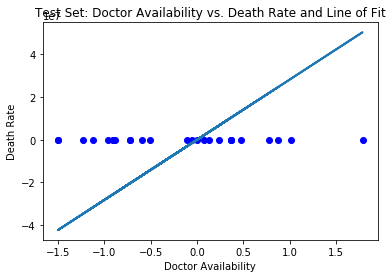

In [9]:
import matplotlib.pyplot as plt

test_prediction = [sum(X_test[i] * w) for i in range(X_test.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(test_data['DoctorAvailability'], Y_test, 'bo')
plt.plot(test_data['DoctorAvailability'], test_prediction, linewidth=2)
plt.title("Test Set: Doctor Availability vs. Death Rate and Line of Fit")
plt.xlabel("Doctor Availability")
plt.ylabel("Death Rate")
plt.show()

In [10]:
print(w)

[2.82718934e+07 2.57535003e-01]


### Cross Validation Performance Results, no Regularization

In [11]:
print("Training sum of squared errors, no regularization:", sum([res**2 for res in Y_train-train_prediction]))
print("Test sum of squared errors, no regularization:", sum([res**2 for res in Y_test-test_prediction]))

Training sum of squared errors, no regularization: 2.8837210437767332e+16
Test sum of squared errors, no regularization: 1.4812626914070718e+16


# Batch Gradient Descent Using Linear Regression With  Regularization (Namely: Gaussian Prior L2 Norm)

### Gradient Descent With Regularization Step

In [12]:
#Note that Linear Regression does have a closed form solution for w (meaning we can just solve for it
#without having to iterate)
#However, we want to show that almost any Machine Learning problem can be solved by Gradient Descent (iteration process)
#Regardless of whether it has a closed form solution or not, but in practice we will use this if it does not have a
#closed form solution or the closed form solution is too computationally demanding

#Randomly generated weights for our Linear model
w = np.array([random.random() for x in range(X_train.shape[1])])
iter_error = 0
error = 100000000000000
tolerance = 0.00001
iteration = 0
samples = X_train.shape[0]


#Batch Gradient Descent
while abs(iter_error - error) > tolerance:
    iteration = iteration + 1
    error = iter_error
    
    #Regularization parameter w, can also have lambda*w where lambda controlls the agressiveness of regularization
    w_errors = 1/samples*(np.dot(X_train.transpose(), np.dot(X_train, w) - Y_train) + w)
    iter_error = sum([w**2 for w in w_errors])
    
    #search for good eta value which decreases the error for this iteration (to guarantee convergence)
    search_iter = 0
    eta_error = iter_error
    eta_rate = 0.00000000000000000000000000001
    w_test = w
    while eta_error >= iter_error:
        seach_iter = search_iter + 1
        eta_rate = eta_rate * 10
        w_test = w_test - eta_rate*eta_error
        #Regularization parameter w, can also have lambda*w where lambda controlls the agressiveness of regularization
        eta_errors = 1/samples*(np.dot(X_train.transpose(), np.dot(X_train, w_test) - Y_train) + w)
        eta_error = sum([w**2 for w in eta_errors])
        if search_iter == 50:
            print("takes too long to converge, reconsider your problem formulation")
            break
    
    #Gradient step: found optimal eta rate so now we step in that direction of w parameter convergence
    w = w - eta_rate*w_errors

    #percaution to not allow our algorithm to run forever
    if iteration == 10000:
        break

### Plotting Results Against Training Set

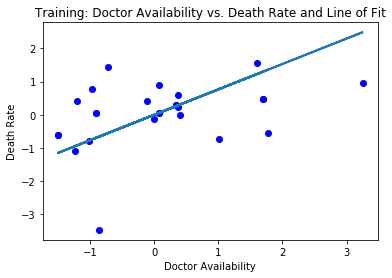

In [13]:
import matplotlib.pyplot as plt

train_prediction = [sum(X_train[i] * w) for i in range(X_train.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(training_data['DoctorAvailability'], Y_train, 'bo')
plt.plot(training_data['DoctorAvailability'], train_prediction, linewidth=2)
plt.title("Training: Doctor Availability vs. Death Rate and Line of Fit")
plt.xlabel("Doctor Availability")
plt.ylabel("Death Rate")
plt.show()

### Plotting Results Against Test Set

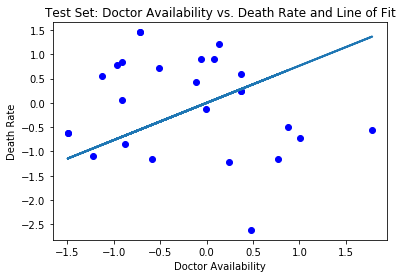

In [14]:
import matplotlib.pyplot as plt

test_prediction = [sum(X_test[i] * w) for i in range(X_test.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(test_data['DoctorAvailability'], Y_test, 'bo')
plt.plot(test_data['DoctorAvailability'], test_prediction, linewidth=2)
plt.title("Test Set: Doctor Availability vs. Death Rate and Line of Fit")
plt.xlabel("Doctor Availability")
plt.ylabel("Death Rate")
plt.show()

### Cross Validation Performance Results Due to Regularization

In [15]:
print("Training sum of squared errors with regularization:", sum([res**2 for res in Y_train-train_prediction]))
print("Test sum of squared errors with regularization:", sum([res**2 for res in Y_test-test_prediction]))

Training sum of squared errors with regularization: 28.675855074069133
Test sum of squared errors with regularization: 42.055444415728886
